Let's explore some neural networks with Google's tensorflow.  We'll be running everything inside this jupyter notebook, which lets us write and execute python code interactively. 

All credit for the material in this lecture goes to Parag Mital's deep learning MOOC on Kadenze (https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-i) and Michael Nielsen's deep learning e-book (http://neuralnetworksanddeeplearning.com/)

First we'll import some libraries

In [1]:
# First check the Python version
import sys
if sys.version_info < (3,4):
    print('You are running an older version of Python!\n\n' \
          'You should consider updating to Python 3.4.0 or ' \
          'higher as the libraries built for this course ' \
          'have only been tested in Python 3.4 and higher.\n')
    print('Try installing the Python 3.5 version of anaconda '
          'and then restart `jupyter notebook`:\n' \
          'https://www.continuum.io/downloads\n\n')

# Now get necessary libraries
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    from skimage import data
    from scipy.misc import imresize
except ImportError:
    print('You are missing some packages! ' \
          'We will try installing them before continuing!')
    !pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17"
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    from skimage import data
    from scipy.misc import imresize
    print('Done!')

# Import Tensorflow
try:
    import tensorflow as tf
except ImportError:
    print("You do not have tensorflow installed!")
    print("Follow the instructions on the following link")
    print("to install tensorflow before continuing:")
    print("")
    print("https://github.com/pkmital/CADL#installation-preliminaries")

# This cell includes the provided libraries from the zip file
try:
    from libs import utils, gif, nb_utils
    import IPython.display as ipyd
except ImportError:
    print("Make sure you have started notebook in the same directory" +
          " as the provided zip file which includes the 'libs' folder" +
          " and the file 'utils.py' inside of it.  You will NOT be able"
          " to complete this assignment unless you restart jupyter"
          " notebook inside the directory created by extracting"
          " the zip file or cloning the github repo.")

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

<a name="what-is"></a>
## What Is Tensorflow? 

From Google: "Tensorflow is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API."

What it really is: One of a number of numerical computing libraries geared towards deep learning and neural networks (others include Theano, Torch, Caffe).  Tensorflow has established itself as one of the more user friendly and robust libraries and has gained a lot more press due to it's use in Google's deep learning research projects (deep dream, Inception, etc)

Example of tensorflow graph model:

![title](tensors_flowing-3.gif)\

Let's do a quick run through of how tensorflow works, we'll start by comparing it to numpy, a standard numerical computation library in python.

Let's take a look at how we might create a range of numbers.  Using numpy, we could for instance use the linear space function:

In [2]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In tensorflow, we could try to do the same thing using their linear space function:

In [3]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)



Instead of a numpy.array, we are returned a tf.Tensor. The name of it is "LinSpace:0". Wherever we see this colon 0, that just means the output of. So the name of this Tensor is saying, the output of LinSpace.
Think of tf.Tensors the same way as you would the numpy.array. It is described by its shape, in this case, only 1 dimension of 100 values. And it has a dtype, in this case, float32. But unlike the numpy.array, there are no values printed here! That's because it actually hasn't computed its values yet. Instead, it just refers to the output of a tf.Operation which has been already been added to Tensorflow's default computational graph. The result of that operation is the tensor that we are returned.

<a name="graphs"></a>
## Graphs

Let's try and inspect the underlying graph.  We can request the "default" graph where all of our operations have been added:

In [4]:
g = tf.get_default_graph()

<a name="operations"></a>
## Operations

And from this graph, we can get a list of all the operations that have been added, and print out their names:

In [5]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

So Tensorflow has named each of our operations to generally reflect what they are doing.  There are a few parameters that are all prefixed by LinSpace, and then the last one which is the operation which takes all of the parameters and creates an output for the linspace.

<a name="tensor"></a>
## Tensor

We can request the output of any operation, which is a tensor, by asking the graph for the tensor's name:

In [6]:
g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

What I've done is asked for the `tf.Tensor` that comes from the operation "LinSpace".  So remember, the result of a `tf.Operation` is a `tf.Tensor`.  Remember that was the same name as the tensor `x` we created before.

<a name="sessions"></a>
## Sessions

In order to actually compute anything in tensorflow, we need to create a `tf.Session`.  The session is responsible for evaluating the `tf.Graph`.  Let's see how this works:

In [7]:
import tensorflow as tf
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

You can also specify which graph you want to use in a given session as an argument to tf.Session()

To simplify things, since we'll be working in iPython's interactive console, we can create an `tf.InteractiveSession`:

In [8]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

Now we didn't have to explicitly tell the `eval` function about our session.  We'll leave this session open for the rest of the presentation.

<a name="tensor-shapes"></a>
## Tensor Shapes

In [9]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


<a name="many-operations"></a>
## Many Operations

Lets try a set of operations now.  We'll try to create a Gaussian curve.  This should resemble a normalized histogram where most of the data is centered around the mean of 0.  It's also sometimes refered to by the bell curve or normal curve.

In [10]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

Just like before, amazingly, we haven't actually computed anything.  We *have just added a bunch of operations to Tensorflow's graph.  Whenever we want the value or output of this operation, we'll have to explicitly ask for the part of the graph we're interested in before we can see its result.  Since we've created an interactive session, we should just be able to say the name of the Tensor that we're interested in, and call the `eval` function:

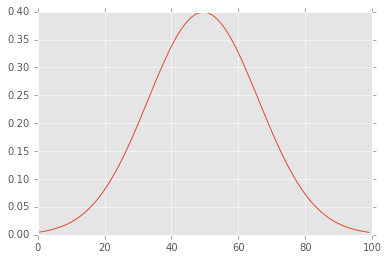

In [11]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
%matplotlib inline
plt.plot(res)

<a name="deep_nets"></a>
# Deep Nets In TensorFlow

<a name="perceptron"></a>
# The Perceptron

The perceptron is a simple model developed by scientist Frank Rosenblatt in the 60s that serves as the basis for modern neural nets.

![title](perceptron.png)

The perceptron takes in a number of variables X1,X2,... and outputs a 0 or 1 based on the sum of its inputs like so:

$$\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}$$

<a name=""></a>

The modern "perceptron" that we use in neural nets is basically just a perceptron with linear regression, plus an "activation function" that applies a non-linearity to the regression equation.

More concretely, a neuron in a neural net uses the equation 

$$\textbf{Y} = \textbf{X}\textbf{W} + \textbf{b}$$

Where X is any input data as a singular value or matrix, W are the weight coefficients applied to X, and b is an additive bias term.

A neural net will have N number of neurons per layer, and a non-linearity will be applied to the output of that layer:

$$\textbf{H} = \phi(\textbf{X}\textbf{W} + \textbf{b})$$

where $\textbf{H}$ is an output layer representing the "hidden" activations of a network, $\phi$ represents some nonlinearity, $\textbf{X}$ represents an input to that layer, $\textbf{W}$ is that layer's weight matrix, and $\textbf{b}$ is that layer's bias matrix.

<a name="activation-functions"></a>
# Activation Functions

There are several functions that are typically used for $\phi$, these are: `relu`, `sigmoid`, and `tanh`.  Let's visualize these:


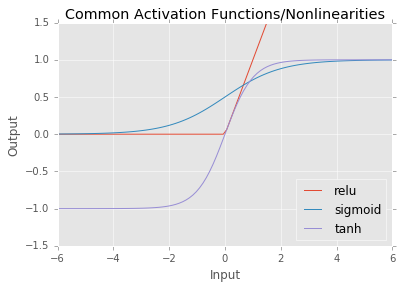

In [12]:
xs = np.linspace(-6, 6, 100)
plt.plot(xs, np.maximum(xs, 0), label='relu')
plt.plot(xs, 1 / (1 + np.exp(-xs)), label='sigmoid')
plt.plot(xs, np.tanh(xs), label='tanh')
plt.xlabel('Input')
plt.xlim([-6, 6])
plt.ylabel('Output')
plt.ylim([-1.5, 1.5])
plt.title('Common Activation Functions/Nonlinearities')
plt.legend(loc='lower right')

<a name="deep-net"></a>
# So What Is a "Deep Net"?

It's just a neural net with multiple 'hidden' layers.

![title](deep_net.png)

<a name="gradient-descent"></a>
# How do deep nets learn?

Whenever we create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, or frame of a video, or text file, or sound file.  The operations of the network are meant to transform this input data into something meaningful that we want the network to learn about.

## Gradient Descent

Initially, all of the parameters of the network (i.e. weights and biases) are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about an image.  To teach it to do that, we're going to use something called "Gradient Descent".  Simply, Gradient descent is a way of optimizing a set of parameters relative to an error metric.

If we move our network's parameters a tiny bit and see what happens to our error, we can actually use that knowledge to find smaller errors.  Let's say the error went up after we moved our network parameters.  Well then we know we should go back the way we came, and try going the other direction entirely.  If our error went down, then we should just keep changing our parameters in the same direction.  The error provides a "training signal" or a measure of the "loss" of our network.

To summarize, Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of its gradient.  The gradient is just saying, how does the error change at the current set of parameters?


<a name="local-minimaoptima"></a>
## Local Minima/Optima

One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point.

Let's say that our cost function looked like:

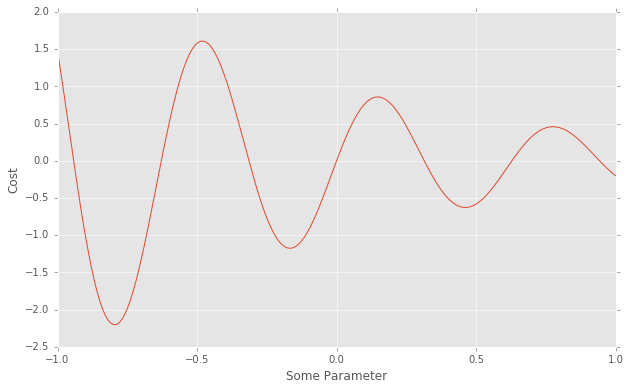

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

We'll never really ever be able to see our entire cost function like this.  If we were able to, we'd know exactly what parameter we should use.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for this illustration at least.

In [14]:
gradient = np.diff(cost)

If we follow the negative gradient of this function given some randomly intialized parameter and a learning rate:

/Users/joshoberman/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/joshoberman/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


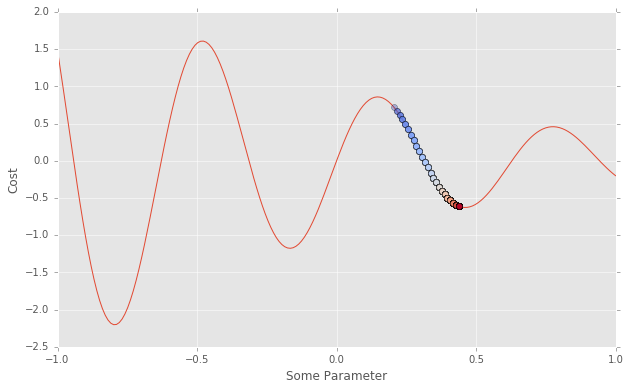

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[init_p]
    ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

Here's the same idea in 3D:


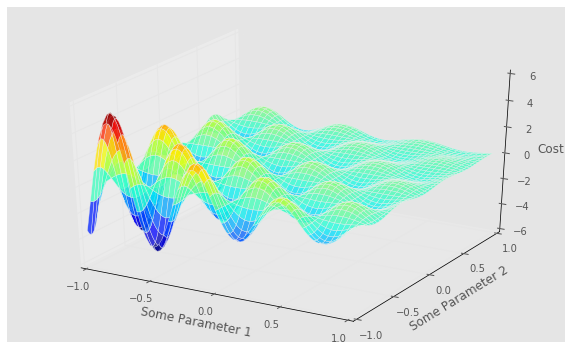

In [16]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')


<a name="learning-rate"></a>
## Learning Rate

Another aspect of learning what our parameters should be, is how far along the gradient we should move our parameters?  That is also known as `learning_rate`.  Let's see what happens for different values of our learning rate:

/Users/joshoberman/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/joshoberman/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


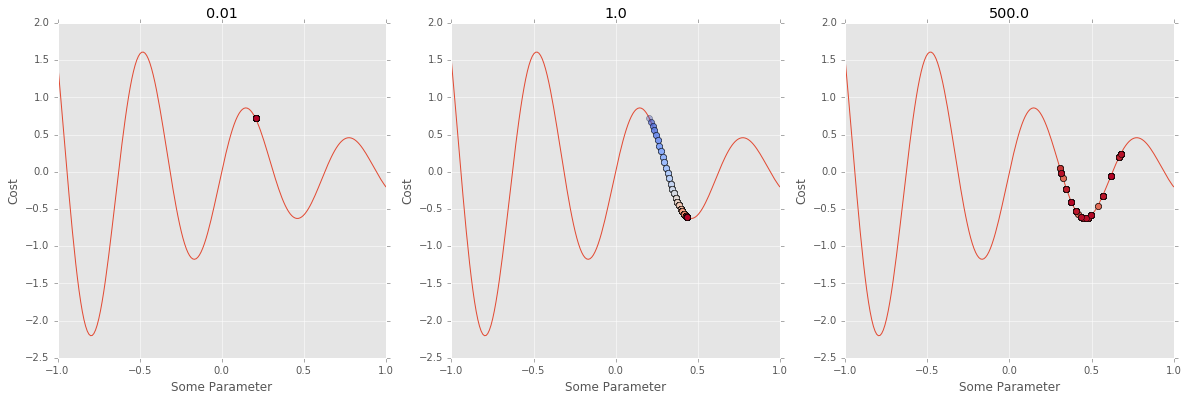

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[init_p]
        ax.plot(x[init_p], cost[init_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In the first case, our learning rate was way too small.  It looks like we didn't manage to get any better cost than where we started!  In the second case, just right.  In the third case, our learning rate was too large.  Meaning, we overshot our minima, and moved past it.  So our cost has the effect of going up and down, instead of just going down like in the second case.

<a name="image-painting"></a>
# Teaching a network to paint

We now have all the pieces in place to do a fun demo: teaching a neural net to paint.  This will not be a classification task, it is pure regression, but it demonstrates all of the fundamentals of training a deep neural net in tensorflow.

<a name="preparing-the-data"></a>
## Preparing the Data


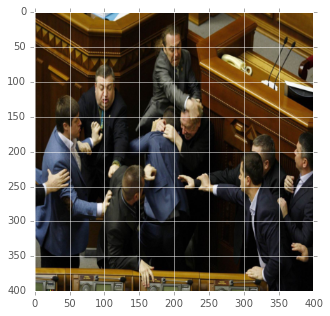

In [18]:
from skimage.data import astronaut
# First load an image
img = plt.imread("/Users/joshoberman/Downloads/kiev_brawl.jpg")

# Be careful with the size of your image.
# Try a fairly small image to begin with,
# then come back here and try larger sizes.
img = imresize(img, (400,400))
plt.figure(figsize=(5, 5))
plt.imshow(img)

# Make sure you save this image as "reference.png"
# and include it in your zipped submission file
# so we can tell what image you are trying to paint!
plt.imsave(fname='reference.png', arr=img)

In [19]:
def split_image(img):
    # We'll first collect all the positions in the image in our list, xs
    xs = []

    # And the corresponding colors for each of these positions
    ys = []

    # Now loop over the image
    for row_i in range(img.shape[0]):
        for col_i in range(img.shape[1]):
            # And store the inputs
            xs.append([row_i, col_i])
            # And outputs that the network needs to learn to predict
            ys.append(img[row_i, col_i])

    # we'll convert our lists to arrays
    xs = np.array(xs)
    ys = np.array(ys)
    return xs, ys

xs, ys = split_image(img)

# and print the shapes
xs.shape, ys.shape

((160000, 2), (160000, 3))

In [20]:
xs = xs.astype(float)
ys = ys.astype(float)

# Normalize the input (xs) using its mean and standard deviation
mn = np.mean(xs,0)
sd = np.std(xs,0)
xs = (xs-mn)/sd

# Just to make sure you have normalized it correctly:
print(np.min(xs), np.max(xs))
assert(np.min(xs) > -3.0 and np.max(xs) < 3.0)

ys = ys / 255.0

-1.7277260797 1.7277260797


What we're going to do is use regression to predict the value of a pixel given its (row, col) position.  So the input to our network is `X = (row, col)` value.  And the output of the network is `Y = (r, g, b)`.  We'll make some tensorflow "placeholder" variables for these I/O values.  A placeholder is a variable who's exact shape/data can be given when a graph is executed

In [21]:
# Let's reset the graph:
tf.reset_default_graph()

# Create a placeholder of None x 2 dimensions and dtype tf.float32
# This will be the input to the network which takes the row/col
X = tf.placeholder(tf.float32,shape=(None,2),name='X')

# Create the placeholder, Y, with 3 output dimensions instead of 2.
# This will be the output of the network, the R, G, B values.
Y = tf.placeholder(tf.float32,shape=(None,3),name='Y')

Now we'll a deep neural network that takes our network input $\textbf{X}$ of 2 neurons, multiplies it by a linear and non-linear transformation which makes its shape [None, 20], meaning it will have 20 output neurons.  Then we'll repeat the same process again to give us 20 neurons again, and then again and again until we've done 6 layers of 20 neurons.  Then finally one last layer which will output 3 neurons, your predicted output $\hat{\textbf{Y}}$, for a total of 6 hidden layers, or 8 layers total including the input and output layers.  Mathematically, we'll be creating a deep neural network that looks just like the previous fully connected layer we've created, but with a few more connections. So recall the first layer's connection is:

\begin{align}
\textbf{H}_1=\phi(\textbf{X}\textbf{W}_1 + \textbf{b}_1) \\
\end{align}

So the next layer will take that output, and connect it up again:

\begin{align}
\textbf{H}_2=\phi(\textbf{H}_1\textbf{W}_2 + \textbf{b}_2) \\
\end{align}

And same for every other layer:

\begin{align}
\textbf{H}_3=\phi(\textbf{H}_2\textbf{W}_3 + \textbf{b}_3) \\
\textbf{H}_4=\phi(\textbf{H}_3\textbf{W}_4 + \textbf{b}_4) \\
\textbf{H}_5=\phi(\textbf{H}_4\textbf{W}_5 + \textbf{b}_5) \\
\textbf{H}_6=\phi(\textbf{H}_5\textbf{W}_6 + \textbf{b}_6) \\
\end{align}

Including the very last layer, which will be the prediction of the network:

\begin{align}
\hat{\textbf{Y}}=\phi(\textbf{H}_6\textbf{W}_7 + \textbf{b}_7)
\end{align}

In [22]:
# We'll create 6 hidden layers.  Let's create a variable
# to say how many neurons we want for each of the layers
# (try 20 to begin with, then explore other values)
n_neurons = 20

# Create the first linear + nonlinear layer which will
# take the 2 input neurons and fully connects it to 20 neurons.
# Use the `utils.linear` function to do this just like before,
# but also remember to give names for each layer, such as
# "1", "2", ... "5", or "layer1", "layer2", ... "layer6".
h1, W1 = utils.linear(X,n_neurons,name='layer1_tanh',activation=tf.nn.tanh)

# Create another one:
h2, W2 = utils.linear(h1,n_neurons,name='layer2_tanh',activation=tf.nn.tanh)

# and four more (or replace all of this with a loop if you can!):
h3, W3 = utils.linear(h2,n_neurons,name='layer3_tanh',activation=tf.nn.tanh)
h4, W4 = utils.linear(h3,n_neurons,name='layer4_tanh',activation=tf.nn.tanh)
h5, W5 = utils.linear(h4,n_neurons,name='layer5_tanh',activation=tf.nn.tanh)
h6, W6 = utils.linear(h5,n_neurons,name='layer6_tanh',activation=tf.nn.tanh)

# Now, make one last layer to make sure your network has 3 outputs:
Y_pred, W7 = utils.linear(h6, 3, activation=None, name='pred')
assert(X.get_shape().as_list() == [None, 2])
assert(Y_pred.get_shape().as_list() == [None, 3])
assert(Y.get_shape().as_list() == [None, 3])

<a name="cost-function"></a>
## Cost Function

Now we're going to work on creating a `cost` function.  The cost should represent how much `error` there is in the network, and provide the optimizer this value to help it train the network's parameters using gradient descent and backpropagation (which is a method that allows for gradient descent to efficiently tune each layers' parameters).

Let's say our error is `E`, then the cost will be:

$$cost(\textbf{Y}, \hat{\textbf{Y}}) = \frac{1}{\text{B}} \displaystyle\sum\limits_{b=0}^{\text{B}} \textbf{E}_b
$$

where the error is measured as, e.g.:

$$\textbf{E} = \displaystyle\sum\limits_{c=0}^{\text{C}} (\textbf{Y}_{c} - \hat{\textbf{Y}}_{c})^2$$

This is known as $l_2$ loss, it relies on squaring the difference between predicted and actual values

Let's try to see what the square in our measure of error is doing graphically.

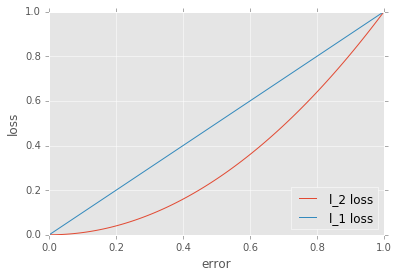

In [23]:
error = np.linspace(0.0, 1.0, 100)
plt.plot(error, error**2, label='l_2 loss')
plt.plot(error, np.abs(error), label='l_1 loss')
plt.xlabel('error')
plt.ylabel('loss')
plt.legend(loc='lower right')

Let's define the cost as the some of squared errors across our dataset.  Again we are not actually doing any calculations here, but defining how error will be computed when the graph is executed.

In [24]:
# first compute the error, the inner part of the summation.
# This should be the l1-norm or l2-norm of the distance
# between each color channel.
error = tf.squared_difference(Y,Y_pred)
assert(error.get_shape().as_list() == [None, 3])

In [25]:
# Now sum the error for each feature in Y. 
# If Y is [Batch, Features], the sum should be [Batch]:
sum_error = tf.reduce_sum(error,reduction_indices=1)
assert(sum_error.get_shape().as_list() == [None])

In [26]:
# Finally, compute the cost, as the mean error of the batch.
# This should be a single value.
cost = tf.reduce_mean(sum_error)
assert(cost.get_shape().as_list() == [])

We now need an `optimizer` which will take our `cost` and a `learning_rate`, which says how far along the gradient to move.  This optimizer calculates all the gradients in our network with respect to the `cost` variable and updates all of the weights in our network using backpropagation.  We'll then create mini-batches of our training data and run the `optimizer` using a `session`.  We'll also be feeding our data in to the network in randomized batches.  This is, vaguely put, because networks love order.  They will pick up on any order you give it and use that to its advantage.  But the order of the data is entirely irrelevant to our problem.  We instead want to randomly feed the network pixel locations and RGB values in order to get the output we desire.  This will be the case with most problem sets and the combination of feeding data in randomized batches with gradient descent is commonly referred to as "Stochastic Gradient Descent"

In [27]:
# Refer to the help for the function
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# Create parameters for the number of iterations to run for (< 100)
n_iterations = 40

# And how much data is in each minibatch (< 500)
batch_size = 100

# Then create a session
sess = tf.Session()

We'll now train our network!  The code below should do this for you if you've setup everything else properly.  Please read through this and make sure you understand each step!  Note that this can take a VERY LONG time depending on the size of your image (make it < 100 x 100 pixels), the number of neurons per layer (e.g. < 30), the number of layers (e.g. < 8), and number of iterations (< 1000).  Welcome to Deep Learning :)

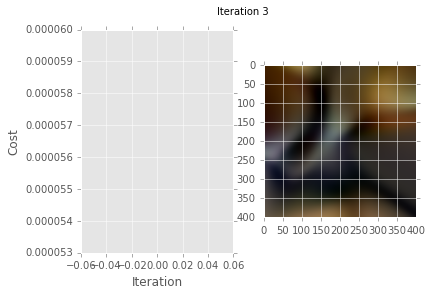

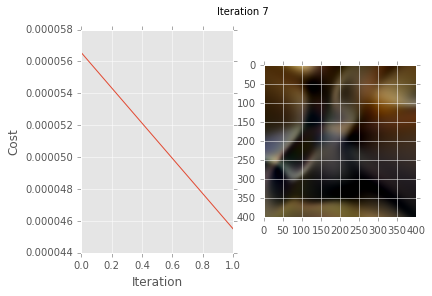

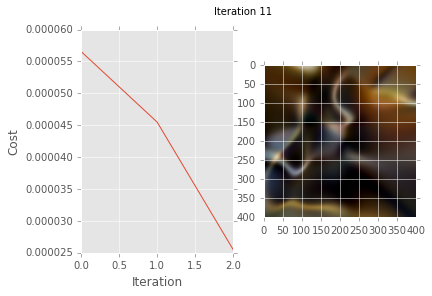

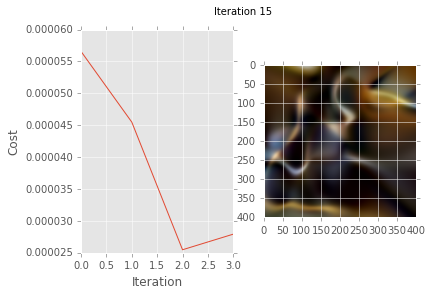

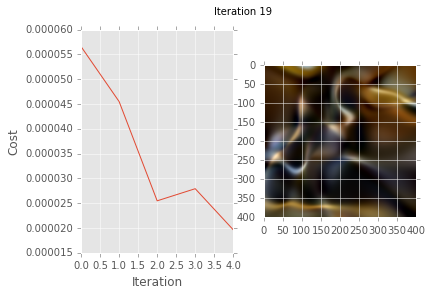

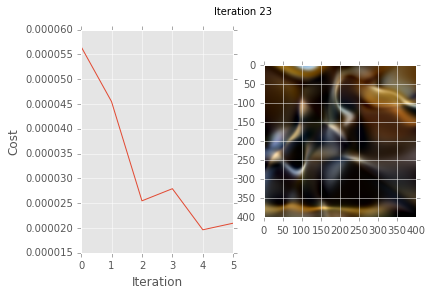

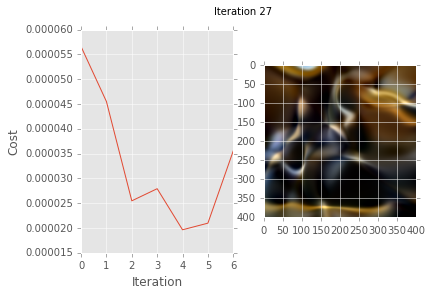

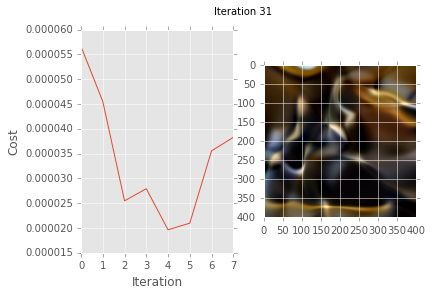

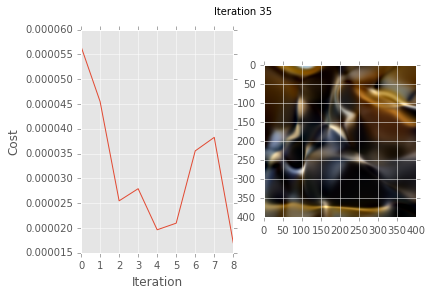

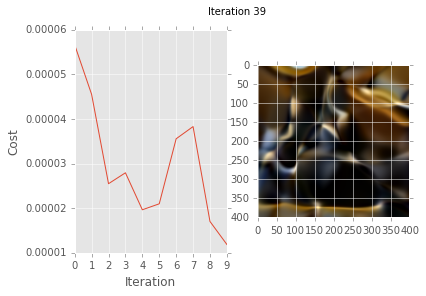

In [28]:
# Initialize all your variables and run the operation with your session
sess.run(tf.initialize_all_variables())

# Optimize over a few iterations, each time following the gradient
# a little at a time
imgs = []
costs = []
gif_step = n_iterations // 10
step_i = 0

for it_i in range(n_iterations):
    
    # Get a random sampling of the dataset
    idxs = np.random.permutation(range(len(xs)))
    
    # The number of batches we have to iterate over
    n_batches = len(idxs) // batch_size
    
    # Now iterate over our stochastic minibatches:
    for batch_i in range(n_batches):
         
        # Get just minibatch amount of data
        idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]

        # And optimize, also returning the cost so we can monitor
        # how our optimization is doing.
        training_cost = sess.run(
            [cost, optimizer],
            feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})[0]

    # Also, every 20 iterations, we'll draw the prediction of our
    # input xs, which should try to recreate our image!
    if (it_i + 1) % gif_step == 0:
        costs.append(training_cost / n_batches)
        ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
        img = np.clip(ys_pred.reshape(img.shape), 0, 1)
        imgs.append(img)
        # Plot the cost over time
        fig, ax = plt.subplots(1, 2)
        ax[0].plot(costs)
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Cost')
        ax[1].imshow(img)
        fig.suptitle('Iteration {}'.format(it_i))
        plt.show()

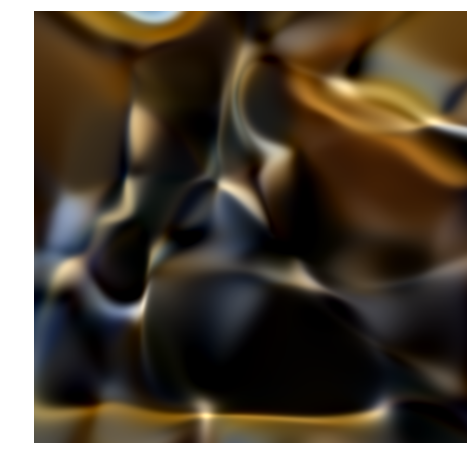

In [29]:
# Save the images as a GIF
_ = gif.build_gif(imgs, saveto='single.gif', show_gif=False)

In [70]:
ipyd.Image(url='single.gif?{}'.format(np.random.rand()),
           height=500, width=500)

<a name="neural-architecture overview"></a>
## Beyond Mere Regression

We don't have time to get in to all of the details like we did above but I want to provide a cursory overview of deep learning net architectures and techniques and what they're used for.

**Autoencoders**: These are nets that have multiple hidden layers that gradually reduce and increase in dimension, through doing so they "encode" compressed information from input data that is then "decoded" in to an output.  This is very similar to PCA and is super useful for unsupervised learning.  It's the basis for the "unsupervised feature learning" aspect of deep neural nets you might hear about.

There's a certain class of Autoencoders widely used called Variational AutoEncoders.  These rely on a concept called weight sharing, which essentially means multiple values in a dataset can share weight terms. This sounds messy, but has been found to work very well in practice.

**Classification**: Deep learning nets are great for classification. Depending on the task, we may use what's called a "softmax function" instead of the standard linear regression equation noted above.  Softmax functions output a value that represent the likelihood of a given X belonging to a certain class.  The other important concept in classification for neural nets is the 

**Recurrent Neural Nets**: These are networks that don't simply feedforward inputs to outputs of the next layer, there instead can be feedback from one layer's neuron(s) to another.  They've proved excellent at learning sequential data such as natural language sentences and more recently melodies.